In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.patches as mpatches
import pandas as pd
import sys
import os
sys.path.append('../scripts_python')  # Add the path to the desired folder
from pca import logistic_pca
import umap
import matplotlib.patches as mpatches

from sklearn.manifold import TSNE


/home/ubuntu/miniconda3/envs/cdd/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/miniconda3/envs/cdd/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/miniconda3/envs/cdd/lib/python3.10/site-packages/umap/distanc

In [2]:
non_binder = 1000
binder = 1000

# Read and shuffle protein_binders
protein_binders = pd.read_pickle('../data/diversity_picking/ECFP6_set2/protein_binders_ECFP6_set2_diversity_picked.pkl')
protein_binders = protein_binders.sample(n=non_binder, random_state=1)

# Read and shuffle protein_nonbinders
protein_nonbinders = pd.read_pickle('../data/diversity_picking/ECFP6_set2/protein_non_binders_ECFP6_set2_diversity_picked.pkl')
protein_nonbinders = protein_nonbinders.sample(n=non_binder, random_state=2)

# Read and shuffle rna_binders
rna_binders = pd.read_pickle('../data/diversity_picking/ECFP6_set2/rna_binders_ECFP6_set2_diversity_picked.pkl')
rna_binders = rna_binders.sample(n=binder, random_state=3)

# Read and shuffle rna_nonbinders
rna_nonbinders = pd.read_pickle('../data/diversity_picking/ECFP6_set2/rna_non_binders_ECFP6_set2_diversity_picked.pkl')
rna_nonbinders = rna_nonbinders.sample(n=non_binder, random_state=4)

# Concatenate the shuffled DataFrames
combined_df = pd.concat([protein_binders, protein_nonbinders, rna_binders, rna_nonbinders], ignore_index=True)

non_binder = 653
binder = 1961

# Read and shuffle protein_binders2
protein_binders2 = pd.read_pickle('../data/diversity_picking/ECFP6_set2/protein_binders_ECFP6_set2_diversity_picked.pkl')
protein_binders2 = protein_binders2.sample(n=non_binder, random_state=1)

# Read and shuffle protein_nonbinders2
protein_nonbinders2 = pd.read_pickle('../data/diversity_picking/ECFP6_set2/protein_non_binders_ECFP6_set2_diversity_picked.pkl')
protein_nonbinders2 = protein_nonbinders2.sample(n=non_binder, random_state=2)

# Read and shuffle rna_binders2
rna_binders2 = pd.read_pickle('../data/diversity_picking/ECFP6_set2/rna_binders_ECFP6_set2_diversity_picked.pkl')
rna_binders2 = rna_binders2.sample(n=binder, random_state=3)

# Read and shuffle rna_nonbinders2
rna_nonbinders2 = pd.read_pickle('../data/diversity_picking/ECFP6_set2/rna_non_binders_ECFP6_set2_diversity_picked.pkl')
rna_nonbinders2 = rna_nonbinders2.sample(n=non_binder, random_state=4)

# Concatenate the shuffled DataFrames
combined_df2 = pd.concat([protein_binders2, protein_nonbinders2, rna_binders2, rna_nonbinders2], ignore_index=True)


In [3]:
rna_list = [rna_binders]

rna_list2 = [rna_binders2]

protein_list = [protein_binders, protein_nonbinders, rna_nonbinders]

protein_list2 = [protein_binders2, protein_nonbinders2, rna_nonbinders2]


In [4]:
combined_df_rna = pd.concat(rna_list, ignore_index=True)

combined_df_rna2 = pd.concat(rna_list2, ignore_index=True)

In [5]:
# create directory for saving similarity matrices
if not os.path.exists('../output/set2'):
    os.makedirs('../output/set2')

In [6]:
combined_df.rename(columns={'source': 'Source'}, inplace=True)

In [7]:


# if 'Source' columns is probes_drugs or zinc_dark_m, then the 'Binding' column is Protein else RNA
# combined_df['Binding'] = np.where(combined_df['Source'] == 'probes_drugs', 'Protein', 'RNA')
# combined_df['Binding'] = np.where(combined_df['Source'] == 'zinc_dark_m', 'Protein', 'RNA')

combined_df['Source'] = combined_df['Source'].replace({'probes_drugs': 'Probes & Drugs', 
                                                       'zinc_dark_m': 'Zinc Dark Matter',
                                                       'robin_b': 'RNA binder', 
                                                       'robin_n': 'RNA non-binder'})

In [8]:

combined_df2.rename(columns={'source': 'Source'}, inplace=True)
# if 'Source' columns is protein_binders or protein_nonbinders, change it to 'Protein'
combined_df2['Binding'] = np.where(combined_df2['Source'] == 'robin_b', 'RNA binder', 'RNA-non-binder')
# combined_df2['Binding'] = np.where(combined_df2['Source'] == 'zinc_dark_m', 'Protein', 'RNA')

# combined_df2['Source'] = combined_df2['Source'].replace({'probe_drugs': 'Protein binder',
#                                                             'zinc_dark_m': 'Protein non-binder',
#                                                             'robin_b': 'RNA binder',
#                                                             'robin_n': 'RNA non-binder'})


In [9]:
# print row where Source id robin_b
combined_df2.loc[combined_df2['Source'] == 'robin_b']

mol  \
1306  <rdkit.Chem.rdchem.Mol object at 0x7fde45d06ca0>   
1307  <rdkit.Chem.rdchem.Mol object at 0x7fde45bce8e0>   
1308  <rdkit.Chem.rdchem.Mol object at 0x7fde45b6d170>   
1309  <rdkit.Chem.rdchem.Mol object at 0x7fde45b5abb0>   
1310  <rdkit.Chem.rdchem.Mol object at 0x7fde45b5be20>   
...                                                ...   
3262  <rdkit.Chem.rdchem.Mol object at 0x7fde45d19850>   
3263  <rdkit.Chem.rdchem.Mol object at 0x7fde4571a200>   
3264  <rdkit.Chem.rdchem.Mol object at 0x7fde45d068e0>   
3265  <rdkit.Chem.rdchem.Mol object at 0x7fde45741b20>   
3266  <rdkit.Chem.rdchem.Mol object at 0x7fde456f1620>   

                                                 smiles  \
1306              Cn1ncnc1CCNc1nc(-c2ccccn2)nc2c1CCNCC2   
1307    Cc1nc(C2CCN(c3cc(OC(C)C)nc(N)n3)CC2)cc(=O)[nH]1   
1308          CCc1cc(N2CCC(NCCn3ccnc3)CC2)nc(N2CCCC2)n1   
1309              O=C(Nc1cc([As](=O)(O)O)ccc1O)c1ccccc1   
1310    Nc1n[nH]c(NCc2ccccc2)c1C(=O)Nc1cccc(C(F)(F)F)c1   
...                                                 ...   
3262           COC(=O)CCc1sc(Nc2ccccc2)nc1-c1ccc(OC)cc1   
3263  COc1ccc(CNc2c(S(=O)(=O)c3ccc(C)cc3)cnc3ccccc23...   
3264                NNc1nc(N)c2c(n1)-c1ccccc1CC21CCCCC1   
3265  Cn1c2c(c(=O)n(C)c1=O)[C@H](c1ccccc1F)C(C#N)=C(...   
3266                      Nc1ccc2nc(SCc3ccc(F)cc3)sc2c1   

                                                  ECFP6   Source     Binding  
1306  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  robin_b  RNA binder  
1307  [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  robin_b  RNA binder  
1308  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  robin_b  RNA binder  
1309  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  robin_b  RNA binder  
1310  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  robin_b  RNA binder  
...                                                 ...      ...         ...  
3262  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...  robin_b  RNA binder  
3263  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  robin_b  RNA binder  
3264  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  robin_b  RNA binder  
3265  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  robin_b  RNA binder  
3266  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  robin_b  RNA binder  

[1961 rows x 5 columns]

Number of samples: 4000
Number of features: 2048
Number of samples: 3920
Number of features: 2048


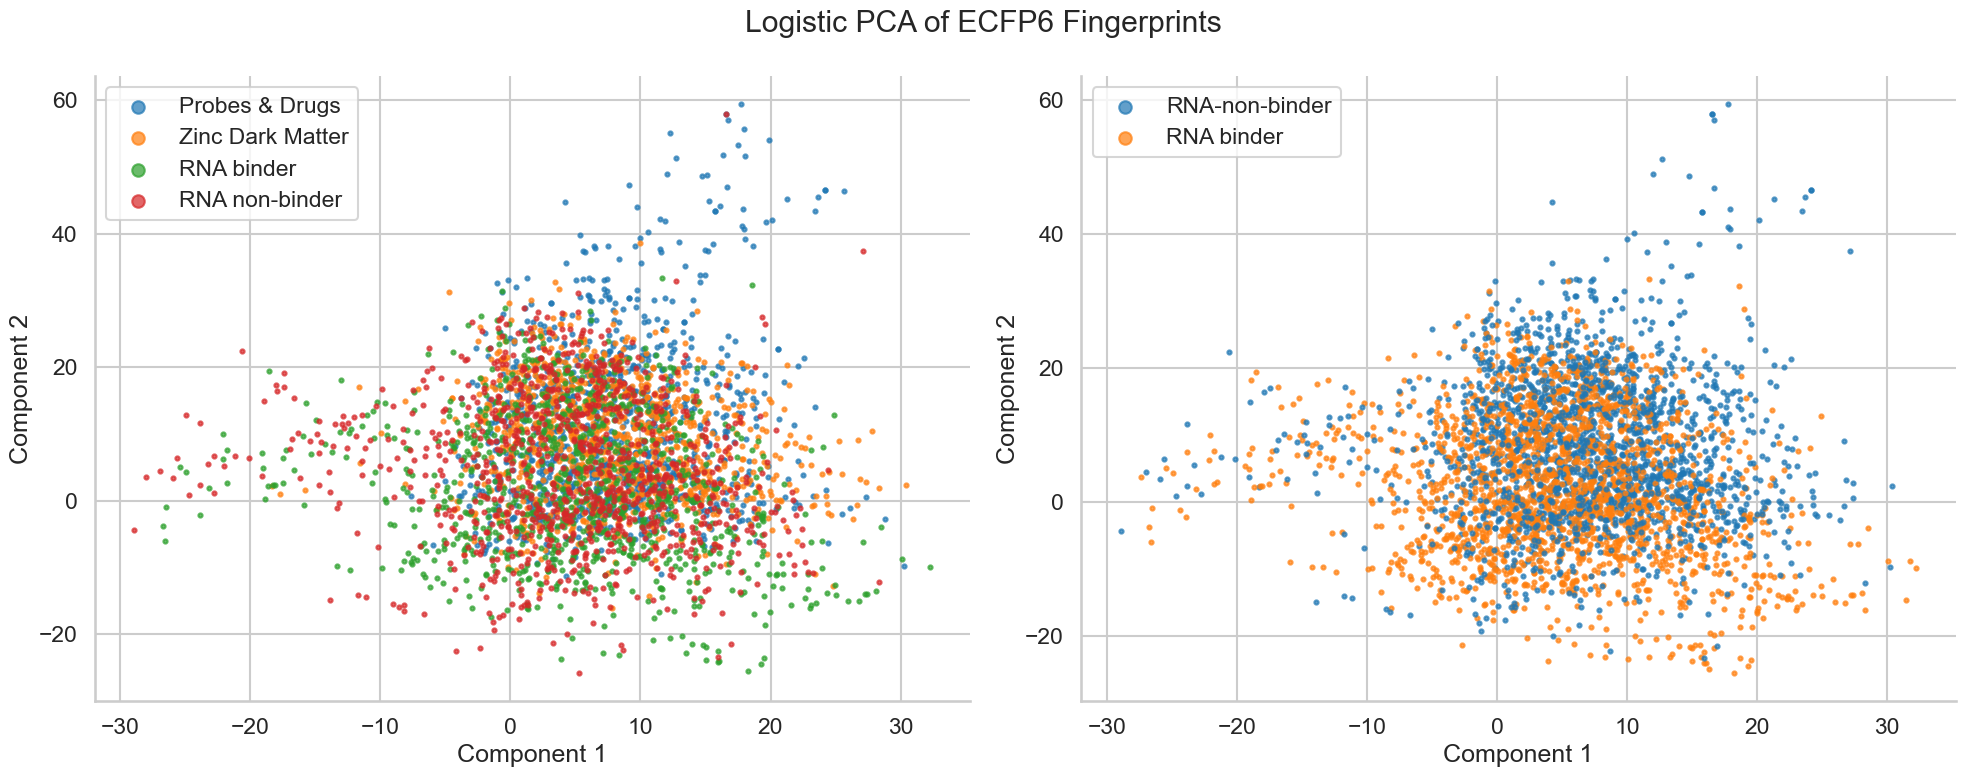

In [10]:


ix_color = np.array(combined_df['Source'].map({'Probes & Drugs': 0, 'Zinc Dark Matter': 1, 'RNA binder': 2, 'RNA non-binder': 3}), dtype=np.int8)
ix_color_2 = np.array(combined_df2['Binding'].map({'RNA binder': 1, 'RNA-non-binder': 0}), dtype=np.int8)

def scatter_plot(Z, ix_color=None, colors=None, source=None, ix_color_2=None, colors_2=None, source_2=None):
    sns.set(style="whitegrid", context='talk')
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # Two subplots in one row
    
    # Used to track which labels have been added to the legend
    added_labels = set()

    # First subplot
    if ix_color is not None and colors is not None and source is not None:
        for i in range(len(ix_color)):
            if source[i] not in added_labels:             
                axs[0].scatter(Z[i, 0], Z[i, 1], c=[colors[ix_color[i]]], label=source[i], s=9, alpha=0.7)
                added_labels.add(source[i])
            else:
                axs[0].scatter(Z[i, 0], Z[i, 1], c=[colors[ix_color[i]]], s=9, alpha=0.7)

        axs[0].set_xlabel('Component 1')
        axs[0].set_ylabel('Component 2')

    added_labels.clear()

    # Second subplot
    if ix_color_2 is not None and colors_2 is not None and source_2 is not None:
        for i in range(len(ix_color_2)):
            if source_2[i] not in added_labels:
                axs[1].scatter(Z2[i, 0], Z2[i, 1], c=[colors_2[ix_color_2[i]]], label=source_2[i], s=9, alpha=0.7)
                added_labels.add(source_2[i])
            else:
                axs[1].scatter(Z2[i, 0], Z2[i, 1], c=[colors_2[ix_color_2[i]]], s=9, alpha=0.7)

        axs[1].set_xlabel('Component 1')
        axs[1].set_ylabel('Component 2')

    axs[0].legend(scatterpoints=1, markerscale=3)
    axs[1].legend(scatterpoints=1, markerscale=3)

    sns.despine()
    plt.suptitle('Logistic PCA of ECFP6 Fingerprints')
    plt.tight_layout()
    plt.savefig('../output/set2/dual_plot.png', dpi=300)
    plt.show()

X = [list(bit_vector) for bit_vector in combined_df['ECFP6'].tolist()]
X2 = [list(bit_vector) for bit_vector in combined_df2['ECFP6'].tolist()]

# Get the dimensions of X
num_samples = len(X)  # Number of samples
num_samples2 = len(X2)  # Number of samples
num_features = len(X[0])  # Number of features
num_features2 = len(X2[0])  # Number of features

print("Number of samples:", num_samples)
print("Number of features:", num_features)
print("Number of samples:", num_samples2)
print("Number of features:", num_features2)

X = np.array(X, dtype=np.float64)
X2 = np.array(X2, dtype=np.float64)

X = X.astype('float64')  # Convert from bool to float
X2 = X2.astype('float64')  # Convert from bool to float

# Cluster with logistic PCA
W = logistic_pca(X, num_components=2)[0]

# Project
Z = X.dot(W)    
Z2 = X2.dot(W)


# Extract original source of the data without repeating = unique
source = combined_df['Source'].tolist()
source_2 = combined_df2['Binding'].tolist()
# Assign colors to each source

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"] # 'red', 'blue', 'green', 'orange', 'purple'] # "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"] # 
colors_2 = ["#1f77b4", "#ff7f0e"]
# Visualize
scatter_plot(Z, ix_color, colors, source, ix_color_2, colors_2, source_2)


In [11]:
# load distance matrixes
distance_matrix_ECFP6 = pd.read_pickle('../output/distance_matrices/v2/distance_matrix_ECFP6_set2.pkl')


In [12]:
# add column 'binding' to the dataframe where the value is 'binding' if the source is 'robin_b' else 'non-binding'
distance_matrix_ECFP6['binding'] = np.where(distance_matrix_ECFP6['source'] == 'robin_b', 'RNA binder', 'RNA non-binder')


In [13]:
distance_matrix_ECFP6

mol       source  \
0     <rdkit.Chem.rdchem.Mol object at 0x7fde45d3d3f0>      robin_b   
1     <rdkit.Chem.rdchem.Mol object at 0x7fde45d3da80>      robin_b   
2     <rdkit.Chem.rdchem.Mol object at 0x7fde45d3db20>      robin_b   
3     <rdkit.Chem.rdchem.Mol object at 0x7fde45d3dcb0>      robin_b   
4     <rdkit.Chem.rdchem.Mol object at 0x7fde45d3dc60>      robin_b   
...                                                ...          ...   
7839  <rdkit.Chem.rdchem.Mol object at 0x7fde3603a390>  zinc_dark_m   
7840  <rdkit.Chem.rdchem.Mol object at 0x7fde3603a3e0>  zinc_dark_m   
7841  <rdkit.Chem.rdchem.Mol object at 0x7fde36202430>  zinc_dark_m   
7842  <rdkit.Chem.rdchem.Mol object at 0x7fde3603a480>  zinc_dark_m   
7843  <rdkit.Chem.rdchem.Mol object at 0x7fde362024d0>  zinc_dark_m   

                                                  ECFP6         binding  
0     [0.0, 0.987012987012987, 0.978494623655914, 0....      RNA binder  
1     [0.987012987012987, 0.0, 0.9814814814814815, 1...      RNA binder  
2     [0.978494623655914, 0.9814814814814815, 0.0, 1...      RNA binder  
3     [0.9736842105263158, 1.0, 1.0, 0.0, 0.98837209...      RNA binder  
4     [0.9590163934426229, 0.9883720930232558, 0.96,...      RNA binder  
...                                                 ...             ...  
7839  [0.8372093023255813, 0.9655172413793104, 1.0, ...  RNA non-binder  
7840  [0.87, 0.8939393939393939, 0.9772727272727273,...  RNA non-binder  
7841  [0.9212598425196851, 0.9895833333333334, 0.903...  RNA non-binder  
7842  [0.9375, 0.9871794871794872, 0.956521739130434...  RNA non-binder  
7843  [0.898989898989899, 1.0, 0.868421052631579, 0....  RNA non-binder  

[7844 rows x 4 columns]

In [14]:
distance_matrix_ECFP6['source'].unique()

array(['robin_b', 'robin_n', 'probes_drugs', 'zinc_dark_m'], dtype=object)

In [15]:


# but these lists should be np arrays

dist_matrix6 = distance_matrix_ECFP6['ECFP6'].tolist()
dist_matrix6 = np.array(dist_matrix6)


<Figure size 640x480 with 0 Axes>

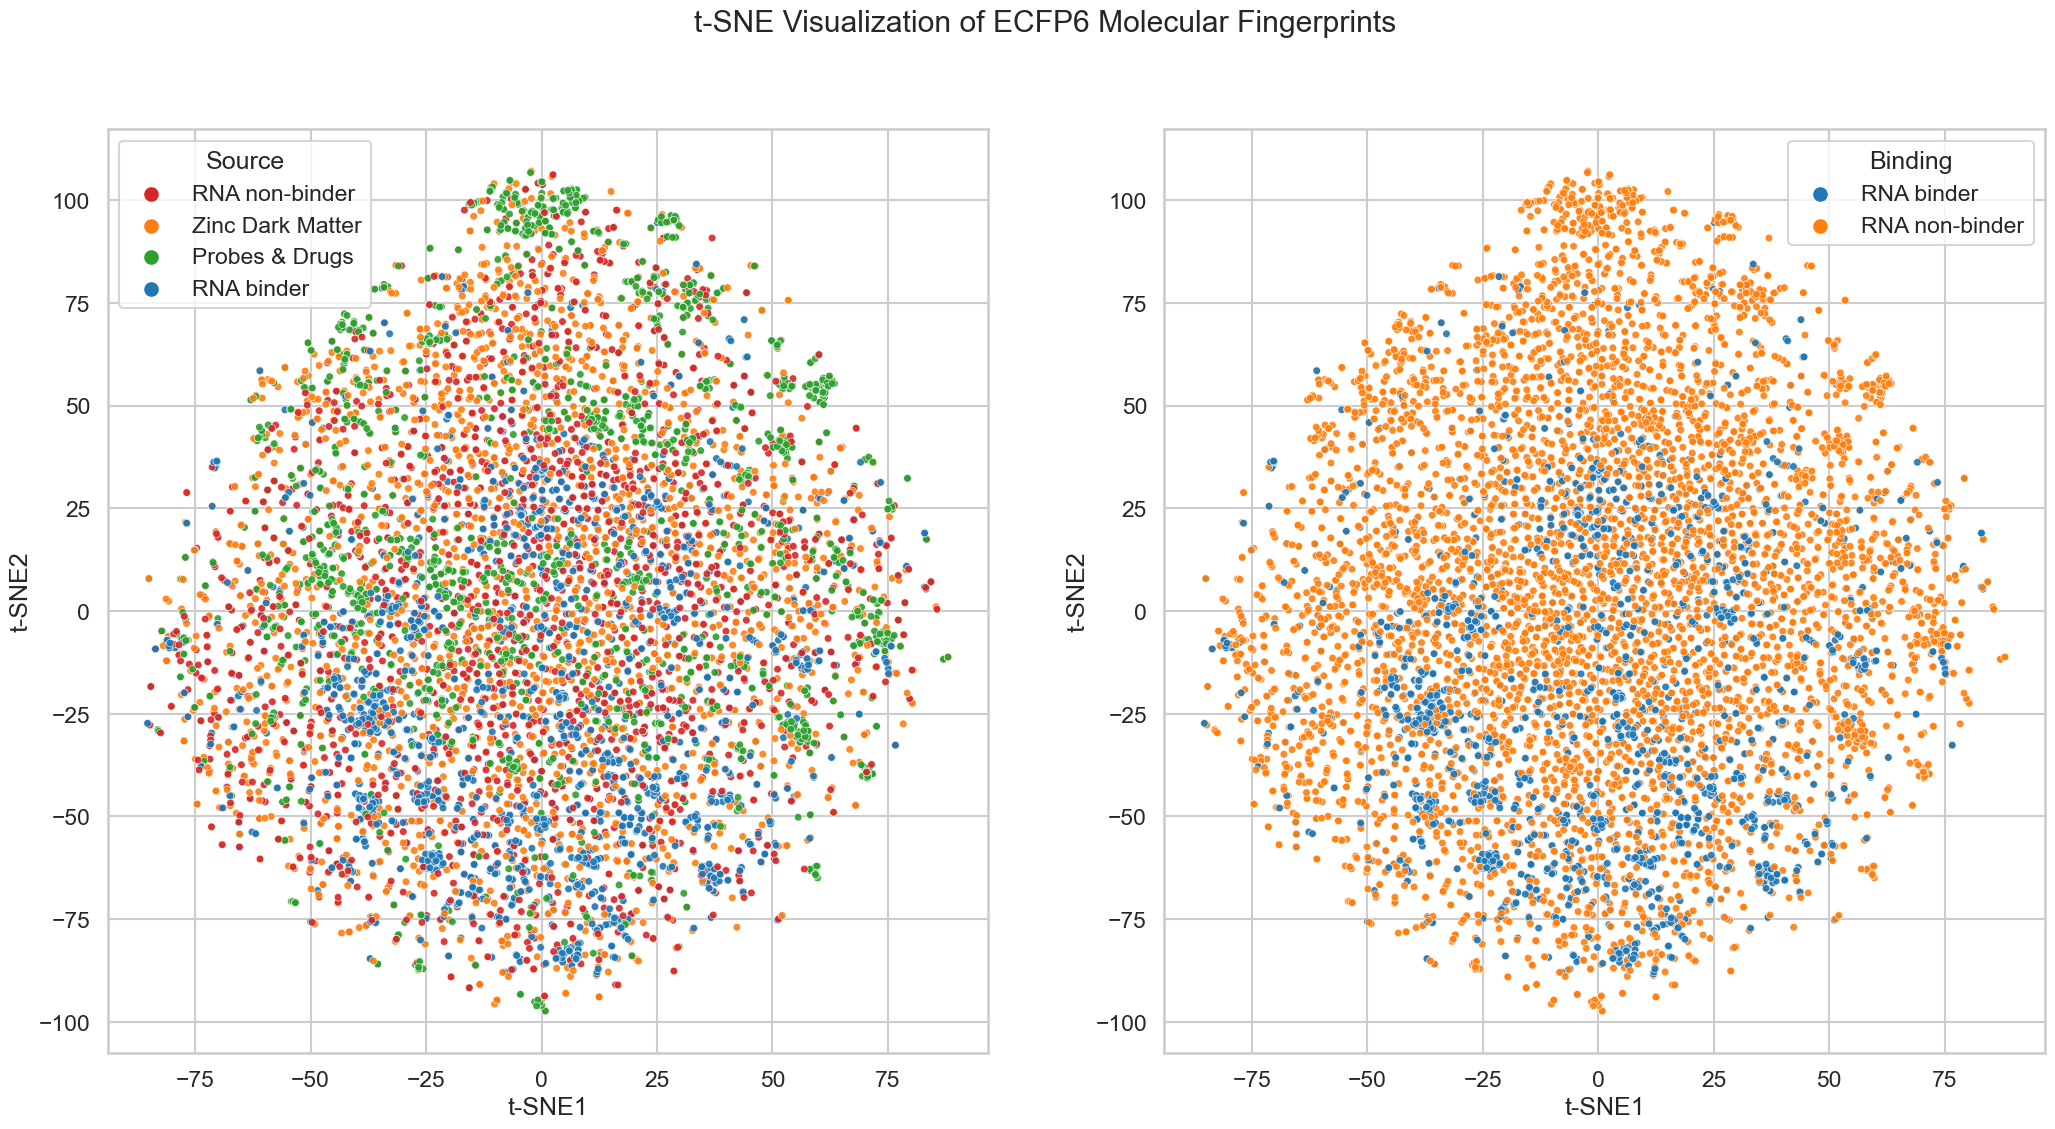

In [16]:
# clear the plot
plt.clf()

pca_data_transformed6 = pd.DataFrame(distance_matrix_ECFP6['source'], columns=['source'])

# we will use t-SNE for dimensionality reduction on distance matrix
n_components = 2
tsne = TSNE(n_components=n_components, n_jobs=16, metric="precomputed", init="random", random_state=42)


# Fit the t-SNE model to the data

pca_data_transformed6 = tsne.fit_transform(dist_matrix6)

pca_data_transformed6 = pd.DataFrame(pca_data_transformed6, columns=['t-SNE1', 't-SNE2'])

pca_data_transformed6['Source'] = distance_matrix_ECFP6['source'].astype(str)
# reaname the values in the column 'Source' enamine_protein to Enamine Protein chemdiv_rna to ChemDiv RNA and so on
pca_data_transformed6['Source'] = pca_data_transformed6['Source'].replace({'probes_drugs': 'Probes & Drugs',
                                                                            'zinc_dark_m': 'Zinc Dark Matter',
                                                                            'robin_b': 'RNA binder',
                                                                            'robin_n': 'RNA non-binder'})

pca_data_transformed6['Binding'] = distance_matrix_ECFP6['binding'].astype(str)


# shuffle the data

pca_data_transformed6 = pca_data_transformed6.sample(frac=1).reset_index(drop=True)


# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(25, 12))

# Set style
sns.set(style="whitegrid", context='talk')

source_order = ['RNA non-binder', 'Zinc Dark Matter', 'Probes & Drugs', 'RNA binder']
binding_order = ['RNA binder', 'RNA non-binder']

custom_palette = sns.color_palette(["#d62728", "#ff7f0e", "#2ca02c", "#1f77b4"])
custom_palette2 = sns.color_palette(["#1f77b4", "#ff7f0e"])

# Plot first subplot
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Source', data=pca_data_transformed6, s=30, ax=ax[0], palette=custom_palette, alpha=0.9, hue_order=source_order)

# Plot second subplot
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Binding', data=pca_data_transformed6, s=30, ax=ax[1], palette=custom_palette2, alpha=0.9, hue_order=binding_order)

# create one title for both subplots
plt.suptitle('t-SNE Visualization of ECFP6 Molecular Fingerprints')

# Save the plot as a PNG file
plt.savefig("../output/set2/tsne_plot_binding_source.png", format="png", dpi=300)


<Figure size 640x480 with 0 Axes>

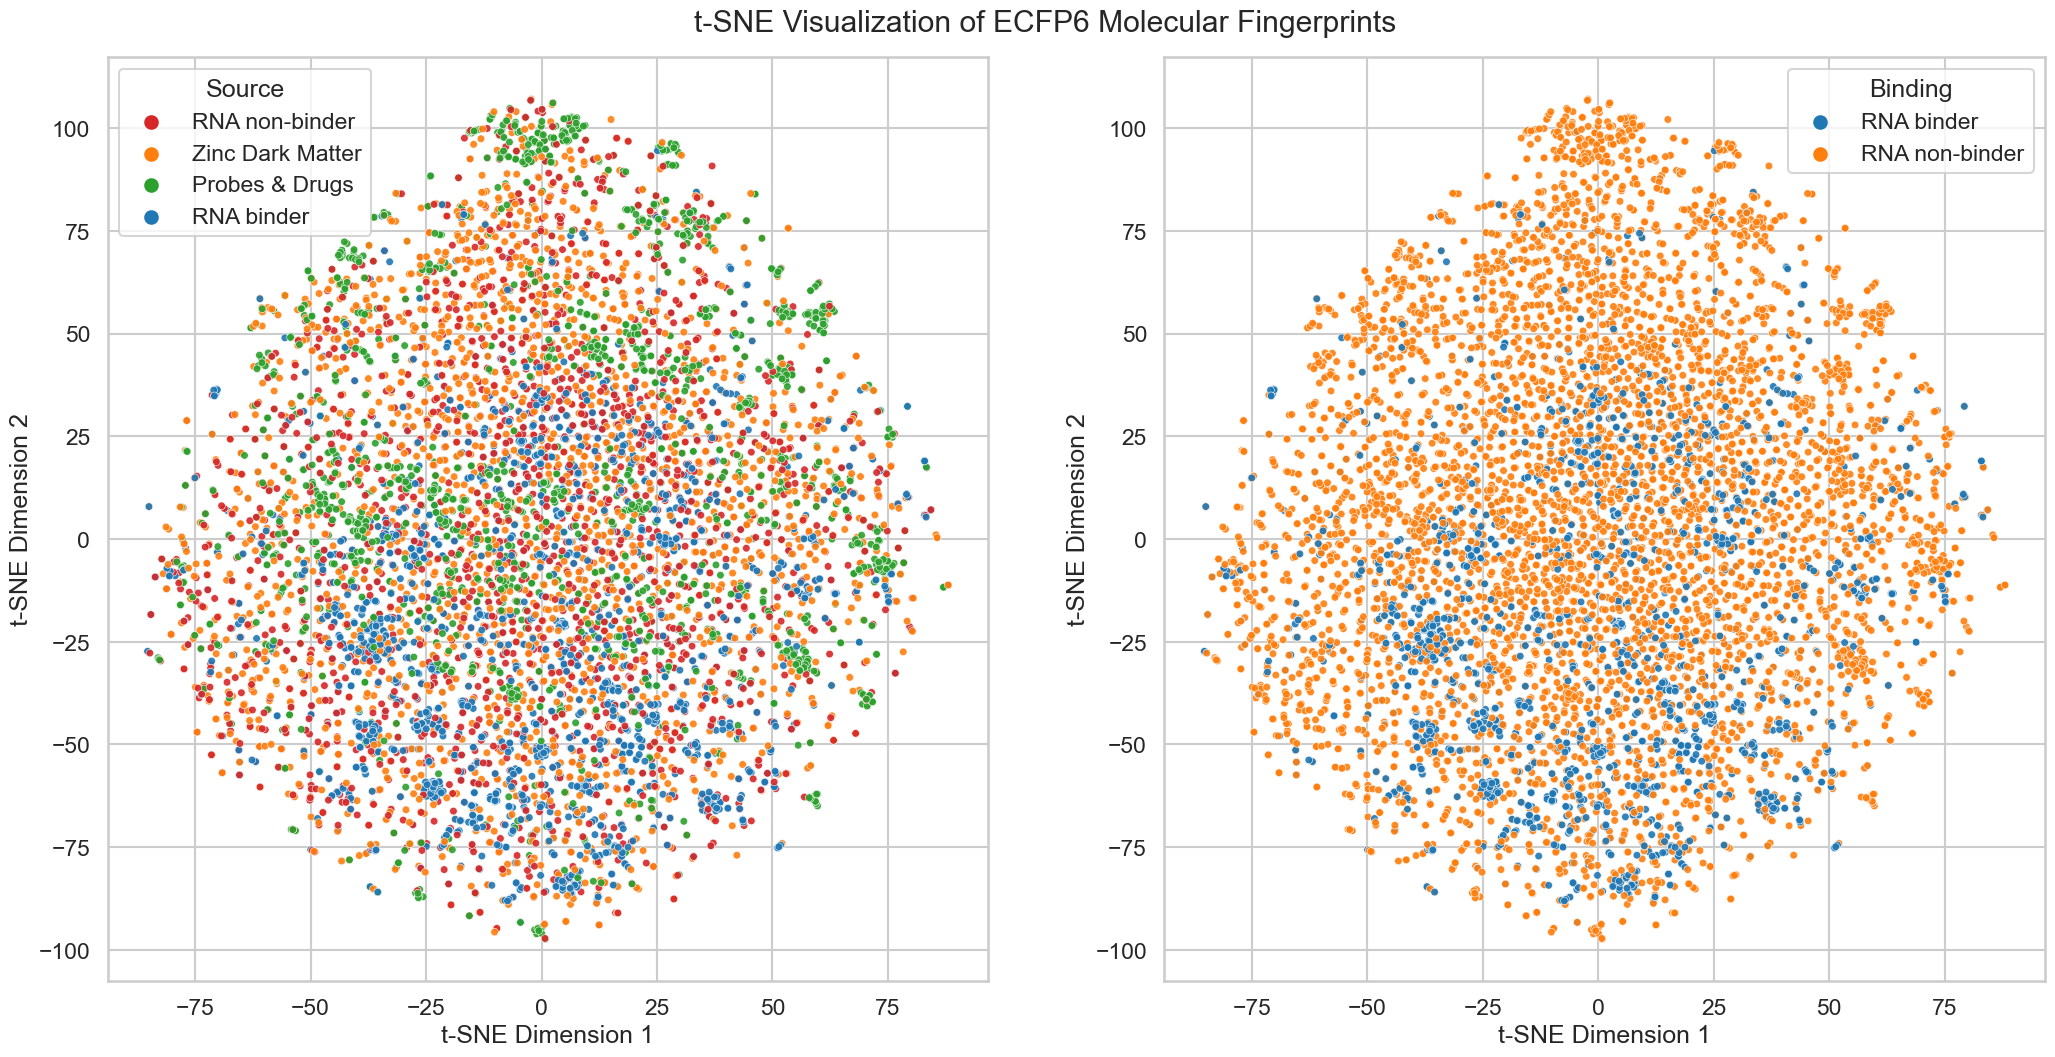

In [17]:
custom_palette = sns.color_palette(["#d62728", "#ff7f0e", "#2ca02c", "#1f77b4"])
custom_palette2 = sns.color_palette(["#1f77b4", "#ff7f0e"])

# clear the plot
plt.clf()

pca_data_transformed6 = pd.DataFrame(distance_matrix_ECFP6['source'], columns=['source'])

# we will use t-SNE for dimensionality reduction on distance matrix
n_components = 2
tsne = TSNE(n_components=n_components, n_jobs=16, metric="precomputed", init="random", random_state=42)

# Fit the t-SNE model to the data
pca_data_transformed6 = tsne.fit_transform(dist_matrix6)

pca_data_transformed6 = pd.DataFrame(pca_data_transformed6, columns=['t-SNE1', 't-SNE2'])

pca_data_transformed6['Source'] = distance_matrix_ECFP6['source'].astype(str)
# rename the values in the column source enamine_protein to Enamine Protein and enamine_rna to Enamine RNA and so on
pca_data_transformed6['Source'] = pca_data_transformed6['Source'].replace({'probes_drugs': 'Probes & Drugs',
                                                                            'zinc_dark_m': 'Zinc Dark Matter',
                                                                            'robin_b': 'RNA binder',
                                                                            'robin_n': 'RNA non-binder'})

pca_data_transformed6['Binding'] = distance_matrix_ECFP6['binding'].astype(str)

# shuffle the data
pca_data_transformed6 = pca_data_transformed6.sample(frac=1).reset_index(drop=True)


# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(25, 12))

# Set style
sns.set(style="whitegrid", context='talk')

source_order = ['RNA non-binder', 'Zinc Dark Matter', 'Probes & Drugs', 'RNA binder']
binding_order = ['RNA binder', 'RNA non-binder']

# Plot first subplot with custom_palette
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Source', data=pca_data_transformed6, s=30, ax=ax[0], palette=custom_palette, alpha=0.9, hue_order=source_order)
ax[0].set_xlabel('t-SNE Dimension 1')  # Change x-axis label
ax[0].set_ylabel('t-SNE Dimension 2')  # Change y-axis label

# Plot second subplot with custom_palette
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Binding', data=pca_data_transformed6, s=30, ax=ax[1], palette=custom_palette2, alpha=0.9, hue_order=binding_order)
ax[1].set_xlabel('t-SNE Dimension 1')  # Change x-axis label
ax[1].set_ylabel('t-SNE Dimension 2')  # Change y-axis label

# Set a common title for both plots
title = 't-SNE Visualization of ECFP6 Molecular Fingerprints'
fig.suptitle(title, y=0.92, ha='center')  # Adjust 'y' to move it down

# Save the plot as a PNG file
plt.savefig("../output/set2/tsne_plot_binding_source_distinc_col.png", format="png", dpi=300)


In [18]:
# Check the number of points per class in 'source' column
source_class_counts = pca_data_transformed6['Source'].value_counts()
print("Number of points per class in 'source' column:")
print(source_class_counts)

# Check the number of points per class in 'binding' column
binding_class_counts = pca_data_transformed6['Binding'].value_counts()
print("\nNumber of points per class in 'binding' column:")
print(binding_class_counts)

Number of points per class in 'source' column:
Source
Probes & Drugs      1961
RNA non-binder      1961
Zinc Dark Matter    1961
RNA binder          1961
Name: count, dtype: int64

Number of points per class in 'binding' column:
Binding
RNA non-binder    5883
RNA binder        1961
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

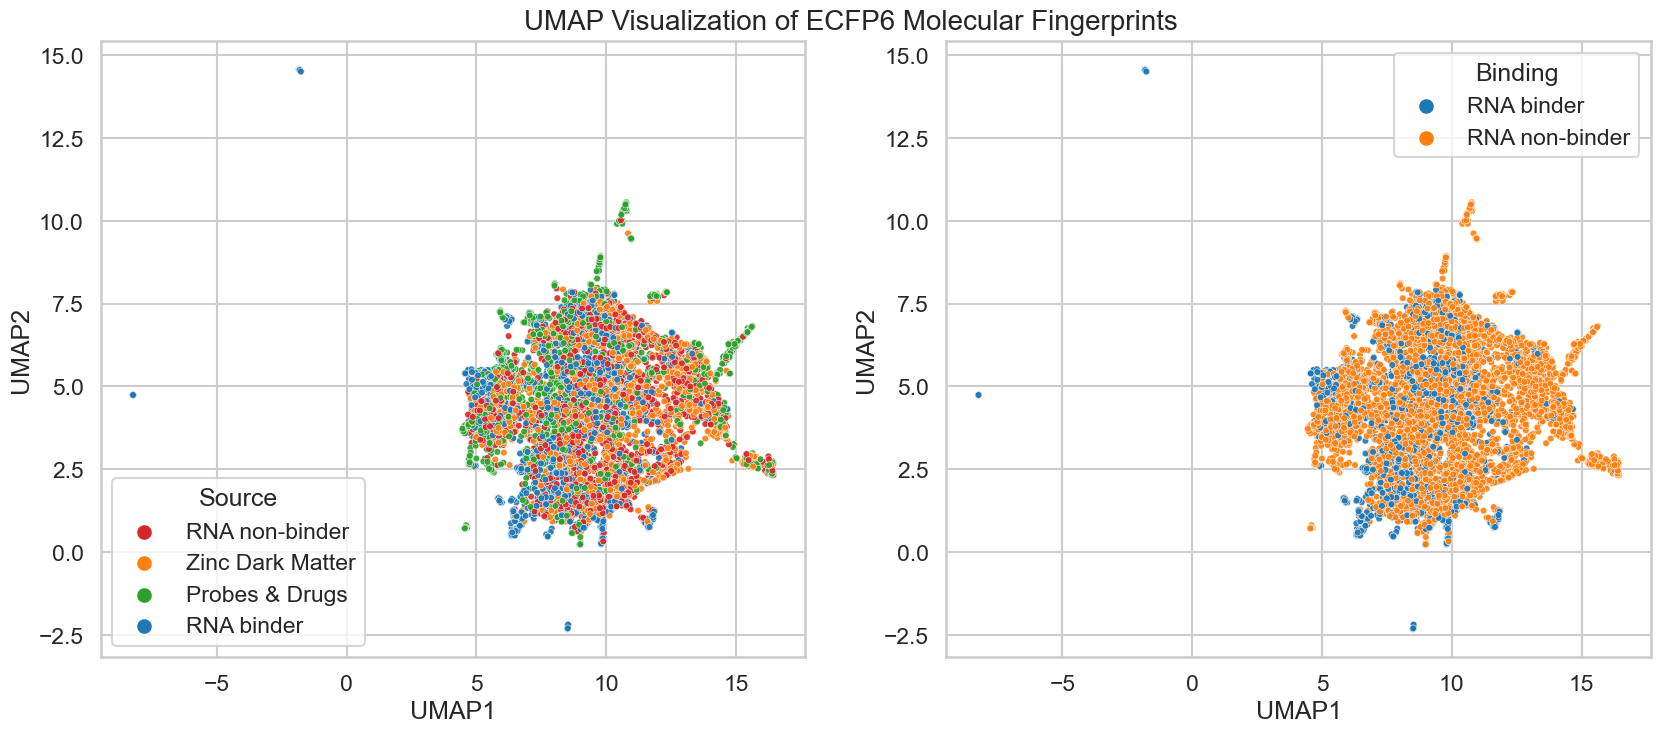

In [19]:

# clear the plot
plt.clf()

# distance matrix is in column 'ECFP4' of distance_matrix_ECFP6
# but these lists should be np arrays

dist_matrix6 = np.array(distance_matrix_ECFP6['ECFP6'].tolist())

pca_data_transformed6 = pd.DataFrame(distance_matrix_ECFP6['source'], columns=['source'])

# we will use UMAP for dimensionality reduction on distance matrix
n_components = 2
umap_model = umap.UMAP(n_components=n_components, n_jobs=15 , random_state=42) #420, 69, 66, 666

# Fit the t-SNE model to the data

pca_data_transformed6 = umap_model.fit_transform(dist_matrix6)

pca_data_transformed6 = pd.DataFrame(pca_data_transformed6, columns=['UMAP1', 'UMAP2'])

pca_data_transformed6['source'] = distance_matrix_ECFP6['source'].astype(str)
#  rename source column to Source
pca_data_transformed6.rename(columns={'source': 'Source'}, inplace=True)

pca_data_transformed6['binding'] = distance_matrix_ECFP6['binding'].astype(str)
# rename binding column to Binding
pca_data_transformed6.rename(columns={'binding': 'Binding'}, inplace=True)

# shuffle the data
pca_data_transformed6 = pca_data_transformed6.sample(frac=1).reset_index(drop=True)

# change the name of values in 'source' column enamine_protein to Enamine Protein and enamine_rna to Enamine RNA and so on
pca_data_transformed6['Source'] = pca_data_transformed6['Source'].map({'probes_drugs': 'Probes & Drugs',
                                                                          'zinc_dark_m': 'Zinc Dark Matter',
                                                                            'robin_b': 'RNA binder',
                                                                            'robin_n': 'RNA non-binder'})

# Define the desired order of categories for 'source' and 'binding'
source_order = ['RNA non-binder', 'Zinc Dark Matter', 'Probes & Drugs', 'RNA binder']
binding_order = ['RNA binder', 'RNA non-binder']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Set style
sns.set(style="whitegrid", context='talk')

# Define color palettes
custom_palette = sns.color_palette(["#d62728", "#ff7f0e", "#2ca02c", "#1f77b4"])
custom_palette2 = sns.color_palette(["#1f77b4", "#ff7f0e"])


# Plot third subplot in the top-right corner
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Source', data=pca_data_transformed6, alpha=0.9, s=23, ax=axs[0], palette=custom_palette, hue_order=source_order)

# Plot fourth subplot in the top-right corner
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Binding', data=pca_data_transformed6, alpha=0.9, s=23, ax=axs[1], palette=custom_palette2, hue_order=binding_order)

fig.suptitle('UMAP Visualization of ECFP6 Molecular Fingerprints', y=0.92, ha='center', fontsize=20)  # Adjust 'y' to move it down

# Save the plot as a PNG file
plt.savefig("../output/set2/umap_plot.png", format="png", dpi=300)

# Display the plot
plt.show()

